In [10]:
import matplotlib.pyplot as plt
import numpy as np

qs = np.array([-1,2,0])
qt = np.array([-0,4,0])
m = 1

def e(k, i):
    return np.sqrt((k-qs[i])**2 + m**2)

def elipt(k, i, j):
    return e(k,i)+e(k,j)+qt[i]-qt[j]

$$
\eta_{ij} = \sqrt{(\vec{k}-\vec{q}_i)^2+m^2}+\sqrt{(\vec{k}-\vec{q}_j)^2+m^2}+q^0_i-q^0_j
$$

[-1.5  1.5 -0.5]
[-2.  2. -2.]


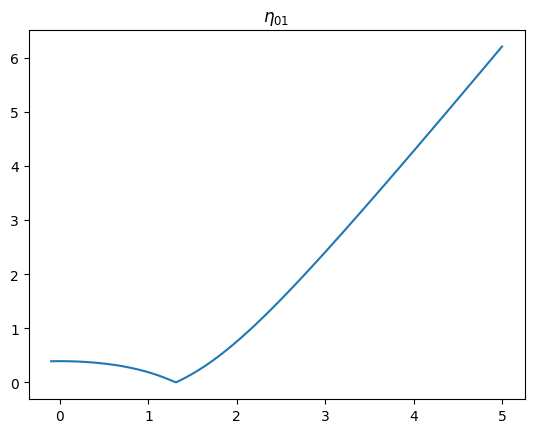

(0.0, 5.447422158961653)

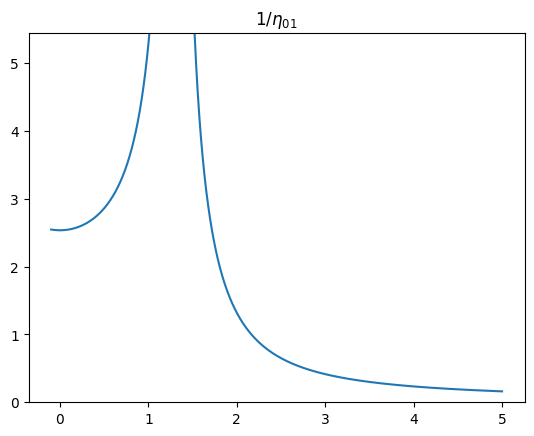

In [11]:
i = 0
j = 1

def reparameterize(i, j):
    global qs, qt
    avg_s = (qs[i]+qs[j])/2
    avg_t = (qt[i]+qt[j])/2
    qs = qs-avg_s
    qt = qt-avg_t
    print(qs)
    print(qt)

reparameterize(i,j)

xs = np.linspace(-0.1,5, int(1e4))
ys = 1/elipt(xs+0j, i, j)

YLIM = 1/np.percentile(1/np.abs(ys), 10)

plt.title(f"$\\eta_{{{i}{j}}}$")
plt.plot(xs, np.abs(1/ys))
plt.show()
plt.title(f"$1/\\eta_{{{i}{j}}}$")
plt.plot(xs, np.abs(ys))
plt.ylim(0,YLIM)

We want to find the 0
$$
\eta_{ij} = \sqrt{(\vec{k}-\vec{q}_i)^2+m^2}+\sqrt{(\vec{k}-\vec{q}_j)^2+m^2}+q^0_i-q^0_j = 0
$$
Consider:
$$
\sqrt{A}+\sqrt{B} + C = 0
$$
$$
A+B+2\sqrt{AB} = C^2
$$
$$
4AB = (C^2-(A+B))^2
$$
Let WLOG $q_i = -q_j = q$. and $\vec{q}^2 + m^2 = Q$
we then have:
$$
A = \vec{k}^2-2\vec{k}\vec{q}+Q
$$
$$
B = \vec{k}^2+2\vec{k}\vec{q}+Q
$$
$$
C = 2 q^0
$$
Inserting these into the result and dividing by 4 we get
$$
((\vec{k}^2-2\vec{k}\vec{q}+Q))(\vec{k}^2+2\vec{k}\vec{q}+Q)
=
(2{q^0}^2 - \vec{k}^2 - Q)^2
$$
$$
(\vec{k}^2+Q)^2-4(\vec{k}\vec{q})^2 =(\vec{k}^2+Q)^2 - 2(\vec{k}^2+Q)(2{q^0}^2)+ 4{q^0}^4
$$
Canceling terms and again dividing by 4 we get
$$
(\vec{k}\vec{q})^2-(\vec{k}^2+Q){q^0}^2+{q^0}^4 = 0
$$
Let's parameterize $\vec{k} = r\vec{\sigma}$
$$
r^2 = (Q-{q^0}^2) \frac{{q^0}^2}{(\vec{\sigma}\vec{q})^2 - {q^0}^2}
$$

In [17]:
from numpy.polynomial import polynomial as P

def get_radius():
    assert(qs[i] == -qs[j] and qt[i] == -qt[j])
    Q = qs[i]**2+m**2
    qt2 = qt[i]**2
    qs2 = qs[i]**2
    return np.sqrt((Q-qt2)*(qt2)/(qs2-qt2))

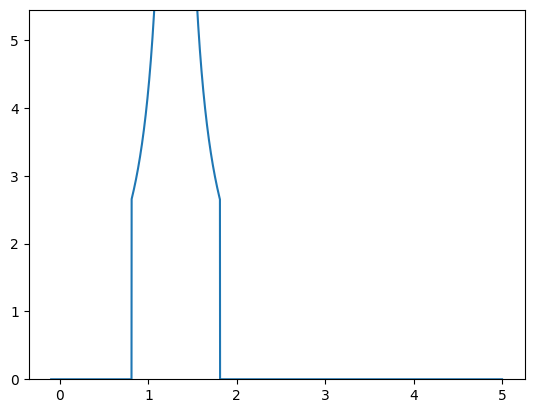

(0.0, 5.447422158961653)

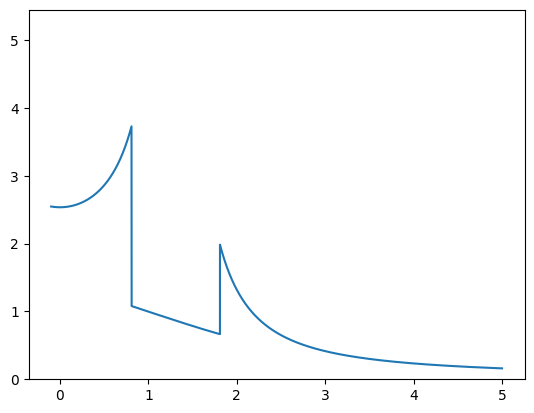

In [18]:
counter_term_radius = 0.5

r_0 = get_radius()

first_derivative = (r_0-qs[0])/e(r_0,0) + (r_0-qs[1])/e(r_0,1)

def counter_term(r):
    return (1/(r-r_0))/first_derivative * (np.abs(xs-r_0) < counter_term_radius)

cs = counter_term(xs)

plt.plot(xs, np.abs(cs))
plt.ylim(0, YLIM)
plt.show()

plt.plot(xs, np.abs(ys-cs))
plt.ylim(0,YLIM)